In [697]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [698]:
df = pd.read_csv('GH_Delivery.csv')
df = df.iloc[:,1:]
df[df.isna().any(axis=1)]

,Order_ID,Agent_Age,Order_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,NaN,Cosmetics
26,qvfd540651807,35,4.3,21.160522,72.771477,21.250522,72.861477,2022-03-12,23:20:00,23:30:00,Cloudy,Low,scooter,Metropolitian,NaN,Electronics
52,fris321432357,28,4.8,11.003681,76.975525,11.083681,77.055525,2022-04-04,NaN,20:55:00,Sandstorms,Jam,motorcycle,Metropolitian,NaN,Kitchen
124,uurs547552548,23,NaN,22.569358,88.433452,22.599358,88.463452,2022-02-17,23:25:00,23:35:00,Sunny,Low,motorcycle,Metropolitian,75.0,Snacks
153,dsbe906886027,29,4.3,22.538731,88.364878,22.598731,88.424878,2022-02-13,23:50:00,23:55:00,Sandstorms,Low,motorcycle,Metropolitian,NaN,Cosmetics
165,edxx482704762,37,4.5,12.975996,80.221898,12.985996,80.231898,2022-03-17,08:40:00,08:55:00,Windy,Low,scooter,Metropolitian,NaN,Books
194,gvea147758996,29,5.0,21.175975,72.795503,21.255975,72.875503,2022-03-27,22:35:00,22:50:00,Sandstorms,Low,scooter,Urban,NaN,Sports
422,njei617905873,29,4.9,21.160437,72.774209,21.200437,72.814209,2022-03-15,12:10:00,12:25:00,Cloudy,High,motorcycle,Urban,NaN,Cosmetics
460,ttrz409682533,24,4.9,22.310237,73.158921,22.420237,73.268921,2022-03-20,19:30:00,19:35:00,Windy,Jam,motorcycle,Metropolitian,NaN,Shoes
471,ccvj862813862,38,4.6,19.1813,72.836191,19.241300,72.896191,2022-03-21,20:10:00,20:20:00,Sandstorms,Jam,scooter,Metropolitian,NaN,Outdoors


In [699]:
df.isna().value_counts()

Order_ID  Agent_Age  Order_Rating  Store_Latitude  Store_Longitude  Drop_Latitude  Drop_Longitude  Order_Date  Order_Time  Pickup_Time  Weather  Traffic  Vehicle  Area   Delivery_Time  Category
False     False      False         False           False            False          False           False       False       False        False    False    False    False  False          False       43161
                                                                                                                                                                          True           False         435
                                                                                                                                        True     False    False    False  False          False          90
                     True          False           False            False          False           False       False       False        False    False    False    False  False          False       

In [700]:
# 총 데이터 개수 43739
print(df.shape[0])

# 데이터 삭제
df = df.dropna()
print(df.shape[0])

df = df[df['Order_Time'] != ' NaN ']
print(df.shape[0])

df = df[df['Store_Latitude'] !='infinite']
df = df.astype({'Store_Latitude': float})
df = df[(df['Store_Latitude']>0) & (df['Store_Longitude']>0) & (df['Drop_Latitude']>0) & (df['Drop_Longitude']>0)]
print(df.shape[0])

# 데이터 대체
age_mean = df[(df['Agent_Age'] >= 20) & (df['Agent_Age'] <= 60)]['Agent_Age'].mean()
df['Agent_Age'] = df['Agent_Age'].apply(lambda x: age_mean if (x<20 or x>60) else x)

df['Order_Rating'] = df['Order_Rating'].apply(lambda x: 5.0 if x >5 else x)

# 결측치 제거 후 총 데이터 개수 38781

processed_df = df.copy()


43739
43161
42298
38781


In [701]:
pd.options.display.max_rows = 20
processed_df.groupby('Category')['Delivery_Time'].agg(['mean','var','median','count'])

,mean,var,median,count
Category,,,,
Apparel,132.128099,2232.530091,130.0,2420
Books,131.170683,2203.701270,130.0,2490
Clothing,130.401352,2247.197259,125.0,2367
Cosmetics,133.442623,2269.850680,130.0,2379
Electronics,131.113520,2044.688212,125.0,2537
Grocery,26.504406,89.185434,26.0,2383
Home,130.785505,2271.354643,125.0,2387
Jewelry,130.612696,2203.231768,125.0,2489
Kitchen,132.253908,2187.679798,130.0,2367


<Figure size 1440x864 with 0 Axes>

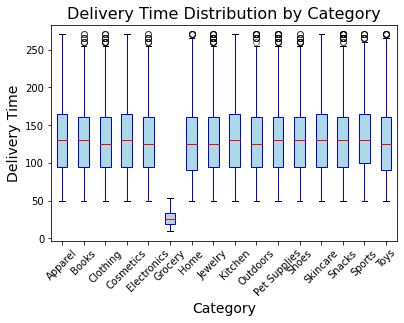

In [702]:
plt.figure(figsize= (20, 12))
processed_df.boxplot(column='Delivery_Time', by='Category', grid=False, patch_artist=True,
             boxprops=dict(facecolor='lightblue', color='blue'),
             whiskerprops=dict(color='blue'),
             medianprops=dict(color='red'),
             flierprops=dict(marker='o', color='orange', alpha=0.5))

plt.title('Delivery Time Distribution by Category', fontsize=16)
plt.suptitle('')  
plt.xlabel('Category', fontsize=14)
plt.ylabel('Delivery Time', fontsize=14)

plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Delivery Time (minutes)')

<Figure size 1440x864 with 0 Axes>

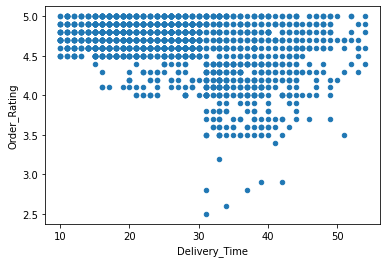

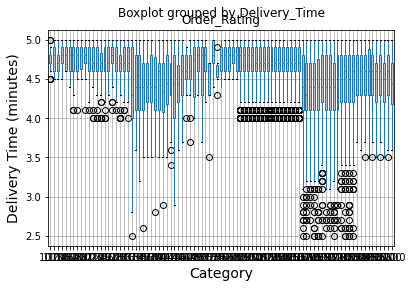

In [703]:
plt.figure(figsize= (20, 12))
processed_df[processed_df['Category']=='Grocery'].plot(kind='scatter',x='Delivery_Time',y='Order_Rating')
processed_df.boxplot(column='Order_Rating',by='Delivery_Time')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Delivery Time (minutes)', fontsize=14)

In [705]:
processed_df[['Delivery_Time','Order_Rating']].corr()

,Delivery_Time,Order_Rating
Delivery_Time,1.000000,-0.303724
Order_Rating,-0.303724,1.000000


In [706]:
new_df = processed_df[processed_df['Category'] != 'Grocery']
new_df
new_df[['Delivery_Time','Order_Rating']].corr(method='spearman')

pd.concat([processed_df.iloc[:,1:7],processed_df['Delivery_Time']],axis=1).corr()

,Agent_Age,Order_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
Agent_Age,1.000000,-0.117010,0.004068,0.009779,0.004048,0.009748,0.256253
Order_Rating,-0.117010,1.000000,-0.004162,0.005991,-0.004872,0.004877,-0.303724
Store_Latitude,0.004068,-0.004162,1.000000,0.001760,0.999977,0.002246,0.012370
Store_Longitude,0.009779,0.005991,0.001760,1.000000,0.001766,0.999945,0.005232
Drop_Latitude,0.004048,-0.004872,0.999977,0.001766,1.000000,0.002322,0.014226
Drop_Longitude,0.009748,0.004877,0.002246,0.999945,0.002322,1.000000,0.008145
Delivery_Time,0.256253,-0.303724,0.012370,0.005232,0.014226,0.008145,1.000000


In [707]:
processed_df['distance'] = ((processed_df['Store_Latitude']-processed_df['Store_Longitude'])**2 + (processed_df['Drop_Latitude']-processed_df['Drop_Longitude'])**2)**(1/2)
processed_df[['distance','Delivery_Time']].corr()

,distance,Delivery_Time
distance,1.000000,-0.007615
Delivery_Time,-0.007615,1.000000


<AxesSubplot:xlabel='Delivery_Time', ylabel='count'>

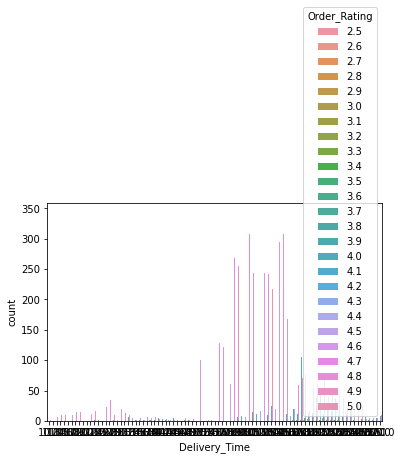

In [708]:
processed_df.groupby('Delivery_Time')['Traffic'].value_counts()
sns.countplot(x='Delivery_Time',hue = 'Order_Rating',data=processed_df)

In [726]:
processed_df['Delivery_Time'].describe()

count    38781.000000
mean       125.073747
std         51.955841
min         10.000000
25%         90.000000
50%        125.000000
75%        160.000000
max        270.000000
Name: Delivery_Time, dtype: float64

In [727]:
processed_df['Order_Rating'].describe()

count    38781.000000
mean         4.641972
std          0.314681
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: Order_Rating, dtype: float64

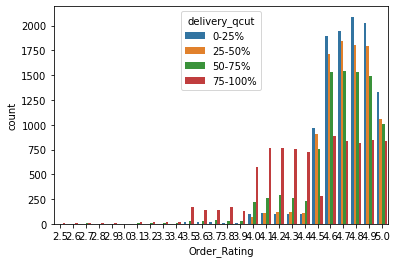

In [718]:
processed_df['delivery_qcut'] = pd.qcut(processed_df['Delivery_Time'], 4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])
ax = sns.countplot(x='Order_Rating',hue='delivery_qcut',data=processed_df)

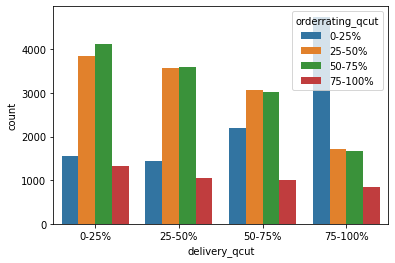

In [725]:
processed_df['orderrating_qcut'] = pd.qcut(processed_df['Order_Rating'], 4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])
ax = sns.countplot(hue='orderrating_qcut',x='delivery_qcut',data=processed_df)